In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
!pip install clean-text
from cleantext import clean
import matplotlib.pyplot as plt
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shaurya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/shaurya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/shaurya/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/shaurya/nltk_data...


/home/shaurya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/shaurya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/shaurya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/shaurya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/shaurya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [6]:
text = """
Have you ever thought to yourself before going to sleep, tomorrow is the day I'll change. 
Tomorrow is the day I'll get up early in the morning, have a healthy breakfast, go for a morning jog, breathe fresh air. 
Tomorrow is the day I want to change to who I really want to be the best version of myself. Well, change doesn't come easy. You have to incorporate certain habits in your life that will eventually lead to you becoming the best version of yourself. You'll also have to eliminate certain habits that are hindering your path. Well, how long will it take you to form a new habit or get rid of an old one? Most people will tell you it takes exactly 21 days for a person to form a habit or get rid of an old one. I remember once in high school, one of my teachers told me, it takes exactly 21 days for me to form a new habit. And I thought, this is my chance to become a bedmaker. I thought that for the next 21 days, instead of getting up every day and yelling, mom, please don't forget to make my bed today, I thought I'd do it myself, day by day, early in the morning, 06:00 a.m. Even on days I was running late, I got up every morning and I made my bed, and I hated every second of it. And by day 22, I opened my eyes, and the first thing I did was say, mom, please don't forget to make my bed today. I quit. And of course, that was expected. And I thought, okay, maybe I'm just going to be a little bit worse at life than bedmakers. Whatever. I do not exaggerate if I say that this 21 day theory is the most famous myth in the world of self development. Let's dive a little into our theory to understand where the number 21 came from and the reasons for its spread in self developmental books and courses. Dr. Maxwell Maltz was a plastic surgeon in the 1950s when he began noticing a strange pattern among his patients. For example, in a nose job, he saw that the patient took exactly 21 days to get used to start seeing his or her new nose. He also noticed that if a patient had an armor leg amputated, the patient would acknowledge the feeling of their new limb for exactly 21 days before starting to get used to their new condition. Dr. Maltz published his theory in a book that went very famous in that era and sold over 30 million copies. And here the conflict started brewing, and it made sense why people were starting to believe his theory. Why? Number one, the number 21 is considered a source a short period of time, and that's also considered a source of temptation, which means something you can do. Number two, the number 21 is also long enough to be believable. A difficult challenge, but not impossible. I mean, who wouldn't love to change their whole life within just 21 days? Wouldn't you love to start waking up early in the morning every day? Wouldn't you love to start cooking healthy recipes? Wouldn't you love to start drinking weird, smoothies and all within less than one month? We'd go for it in a heartbeat. So, is it true? Can we really change our lives within 21 days? I know that sounds very exciting, but there are actually a few factors you'd have to consider to be able to estimate the time it will take you to form a new habit or get rid of an old toxic one. Number one is the complexity of your goal. If I decide to start eating fruit daily, which is considered a simple habit, I'd probably take less time than if I want to acquire a complex athletic skills like a tennis serve. Number two, behavior consistency affects the speed of acquisition. Me repeating a certain behavior for three minutes a day is different than my friend repeating the same behavior for 30 minutes a day. So we want to clear things up. How long will it take us to form a new habit or get rid of an old one? And is there a reliable study that we can depend on? Answer is yes. There is a famous study by the psychologist Philip Olay titled How Our Habits Formed. The study followed 96 people over a period of twelve weeks. Each person chose a new twelve week habit to work on, such as drinking three cups of water before lunch or running for 15 minutes after dinner. After twelve weeks, the data is analyzed to determine the time needed to move from the old habit to start subconsciously carrying out the new one. And after twelve weeks, we found that it took approximately two to eight months in order for the task to become a habit, and 66 days to be exact. The difference in time it took to form a habit was largely due to the task itself, the person and their circumstances, as some were able to form the habit within 18 days, while others took 254 days. So, according to psychologist Lally, if you want to know the time required to form a new habit or get rid of an old one, the truth is that you may need two to eight months, and not just 21 days. Guys, whether it's two months, three months, a year, two years, it doesn't actually matter how long it takes, as much as it matters that you have to begin with today. And once you begin, make sure to maintain your new habit. Make it part of your schedule, set reminders, create a supportive environment. And most importantly, you don't have to be perfect. Making a mistake once or twice has no lasting effects on your behavior. Actually, that'll give you time not to rush yourself into things. You have to give yourself time and not just rush yourself into becoming a better virgin. If I want to become a better person, I'll have to commit to the system and embrace the process. That way, I'll commit to making tiny improvements rather than rushing myself too hard into things. Change is not always easy, and it's not always simple. But with enough dedication, any habit can be reshaped. So if you really want it becoming the best version of yourself, get up today and start working on it. I promise you'll get there. Thank you.
"""

In [7]:
clean_text = clean(text,
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="en"                       # set to 'de' for German special handling
)

In [8]:
en_stops = set(stopwords.words('english'))

words = word_tokenize(clean_text)


frequencyTable = dict()
for word in words:
  word = word.lower()
  if word in en_stops:
    continue
  word = (lemmatizer.lemmatize(word))
  if word in frequencyTable:
    frequencyTable[word] += 1
  else:
    frequencyTable[word] = 1

print(frequencyTable)

{'ever': 1, 'thought': 5, 'going': 2, 'sleep': 1, 'tomorrow': 3, 'day': 23, 'ill': 4, 'change': 6, 'get': 10, 'early': 3, 'morning': 5, 'healthy': 2, 'breakfast': 1, 'go': 2, 'jog': 1, 'breathe': 1, 'fresh': 1, 'air': 1, 'want': 7, 'really': 3, 'best': 3, 'version': 3, 'well': 2, 'doesnt': 2, 'come': 1, 'easy': 2, 'incorporate': 1, 'certain': 3, 'habit': 17, 'life': 4, 'eventually': 1, 'lead': 1, 'becoming': 3, 'youll': 2, 'also': 4, 'eliminate': 1, 'hindering': 1, 'path': 1, 'long': 4, 'take': 7, 'form': 8, 'new': 11, 'rid': 5, 'old': 6, 'one': 10, 'people': 3, 'tell': 1, 'exactly': 4, 'person': 4, 'remember': 1, 'high': 1, 'school': 1, 'teacher': 1, 'told': 1, 'chance': 1, 'become': 3, 'bedmaker': 1, 'next': 1, 'instead': 1, 'getting': 1, 'every': 4, 'yelling': 1, 'mom': 2, 'please': 2, 'dont': 3, 'forget': 2, 'make': 4, 'bed': 3, 'today': 4, 'id': 2, 'even': 1, 'running': 2, 'late': 1, 'got': 1, 'made': 2, 'hated': 1, 'second': 1, 'opened': 1, 'eye': 1, 'first': 1, 'thing': 4, 'say'

In [9]:
sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
  for word, freq in frequencyTable.items():
    word = (lemmatizer.lemmatize(word))
    if word in sentence.lower():
      if sentence in sentenceValue:
        sentenceValue[sentence] += freq
      else:
        sentenceValue[sentence] = freq

sumValues = 0;
for sentence in sentenceValue:
  sumValues += sentenceValue[sentence]

average = int(sumValues/len(sentenceValue))

summary = ''
for sentence in sentences:
  if(sentence in sentenceValue) and (sentenceValue[sentence] > (1.3*average)):
    summary+= " " + sentence

print(sentenceValue)

{"\nHave you ever thought to yourself before going to sleep, tomorrow is the day I'll change.": 48, "Tomorrow is the day I'll get up early in the morning, have a healthy breakfast, go for a morning jog, breathe fresh air.": 54, 'Tomorrow is the day I want to change to who I really want to be the best version of myself.': 50, "Well, change doesn't come easy.": 11, 'You have to incorporate certain habits in your life that will eventually lead to you becoming the best version of yourself.': 47, "You'll also have to eliminate certain habits that are hindering your path.": 30, 'Well, how long will it take you to form a new habit or get rid of an old one?': 88, 'Most people will tell you it takes exactly 21 days for a person to form a habit or get rid of an old one.': 109, 'I remember once in high school, one of my teachers told me, it takes exactly 21 days for me to form a new habit.': 93, 'And I thought, this is my chance to become a bedmaker.': 19, "I thought that for the next 21 days, in

In [10]:
print(summary)

 Tomorrow is the day I'll get up early in the morning, have a healthy breakfast, go for a morning jog, breathe fresh air. Well, how long will it take you to form a new habit or get rid of an old one? Most people will tell you it takes exactly 21 days for a person to form a habit or get rid of an old one. I remember once in high school, one of my teachers told me, it takes exactly 21 days for me to form a new habit. I thought that for the next 21 days, instead of getting up every day and yelling, mom, please don't forget to make my bed today, I thought I'd do it myself, day by day, early in the morning, 06:00 a.m. And by day 22, I opened my eyes, and the first thing I did was say, mom, please don't forget to make my bed today. For example, in a nose job, he saw that the patient took exactly 21 days to get used to start seeing his or her new nose. He also noticed that if a patient had an armor leg amputated, the patient would acknowledge the feeling of their new limb for exactly 21 days 

# ***`Analysis of the output `***





In [18]:
print("The length of input is " + str(len(text))+ " words whereas the summarised output is " + str(len(summary))+ " words")
print("\n")
res = len(summary)/len(text)*100
print("This means the summary is now "+ str(math.trunc(res))+ "% of the input")

The length of input is 5803 words whereas the summarised output is 2595 words


This means the summary is now 44% of the input


In [14]:
from operator import itemgetter
res = dict(sorted(frequencyTable.items(), key = itemgetter(1), reverse = True)[:5])
print("The most frequent root words are  " + str(res))

The most frequent root words are  {'day': 23, 'habit': 17, 'new': 11, 'get': 10, 'one': 10}


In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [21]:
word_cloud = WordCloud(collocations = False, background_color = 'white',width=800, height=400).generate(text)

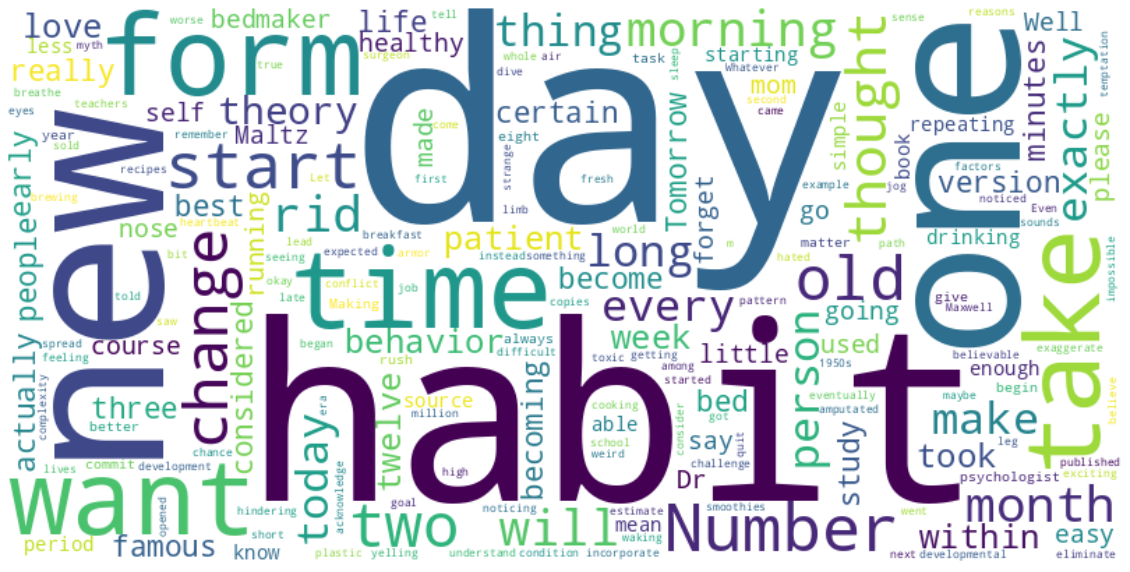

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
word_cloud_summary = WordCloud(collocations = False, background_color = 'white',width=800, height=400).generate(summary)

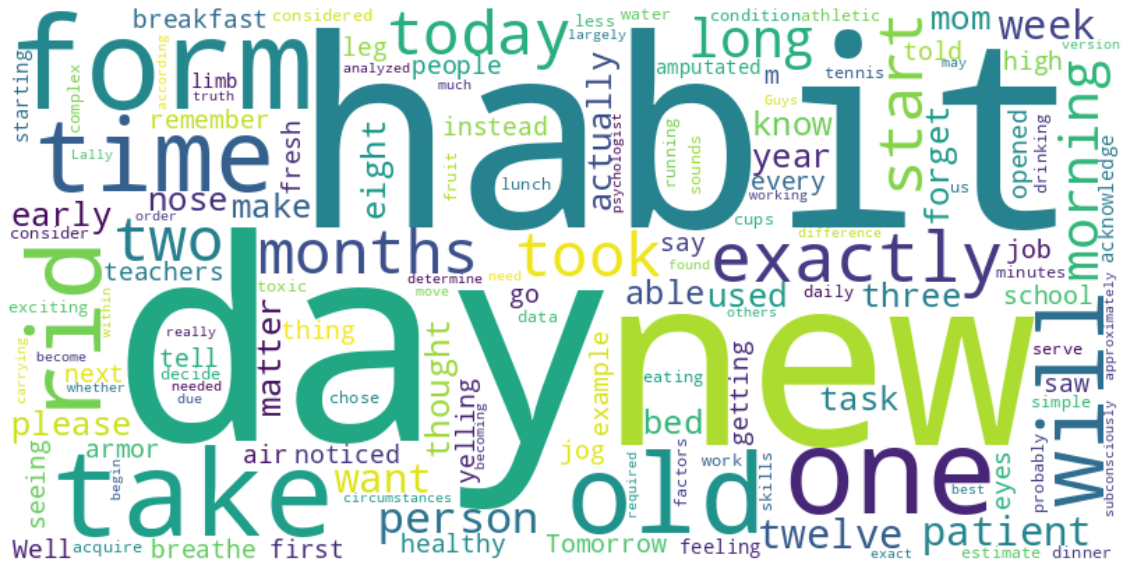

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud_summary, interpolation='bilinear')
plt.axis("off")
plt.show()